<a href="https://colab.research.google.com/github/salazar-io/Challenge-Data-Visualization_DevF/blob/main/Copy_of_Copia_de_Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Challenge (11/8): Datos abiertos del Instituto Nacional de Estadística y Geografía (INEGI)

¡Bien hecho, Dani! En el reto anterior aprendista mucho. Ahora nos toca comenzar a hacer algo de análisis exploratorio, comencemos con algunas gráficas para datos numéricos.

IMPORTANTE: Toma en cuenta las preguntas que planteaste en el reto anterior. Las variables numéricas involucradas en esas preguntas deberían ser exploradas en este reto con las gráficas propuestas.

In [1]:
# Autor:    Edgar Salazar Serrano
# Titulo:   Challenge 2: Data visualization
# Fecha:    11/08/2022 

from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", palette="rocket")
sns.set_context("paper")

In [2]:
#uploaded = files.upload()

Saving conjunto_de_datos_tvivienda_enfih_2019.csv to conjunto_de_datos_tvivienda_enfih_2019 (5).csv


In [3]:
# importando el censo 
inegi_df = pd.read_csv("/content/conjunto_de_datos_tvivienda_enfih_2019.csv")


In [4]:
inegi_df.head()

,FOLIO,VIV_SEL,P1_1,P1_2,P1_3,P3_0,P3_1,P3_2,P3_3,P3_3A,...,P4_52,P4_53,P4_54,P4_55,EDIS,UPM_DIS,FAC_VIV,ESTRATO,TLOC,ENT
0,1,1,2,1,NaN,1,2,5,1,1.0,...,NaN,NaN,NaN,100000,2,1,584,3,1,1
1,2,2,1,1,NaN,1,4,6,1,1.0,...,NaN,NaN,NaN,35000,2,1,584,3,1,1
2,3,3,3,1,NaN,1,3,5,1,1.0,...,NaN,NaN,NaN,999999999,2,1,584,3,1,1
3,4,4,3,1,NaN,1,3,6,1,1.0,...,NaN,NaN,NaN,30000,2,1,584,3,1,1
4,5,5,7,1,NaN,1,5,6,1,1.0,...,NaN,NaN,NaN,70000,2,1,584,3,1,1


In [5]:
inegi_df2 = inegi_df[["P1_1","P3_1","P3_2","P3_7_1","P3_8_1","P3_9_1","P4_1","P4_10","P4_10A","P4_6","P4_50","P4_55"]]

##Diccionario de Datos, definicion de las columnas
P1_1: ¿Cuántas personas viven normalmente en esta vivienda contando a los niños chiquitos, adultos mayores y personas con discapacidad? Incluya a los trabajadores domésticos que viven aquí.  

P3_1: En esta vivienda, ¿cuántos cuartos se usan para dormir, sin contar pasillos?  
+ 01...10 Número de cuartos
+ 99 No especificado
 
P3_2: ¿Cuántos cuartos tiene en total esta vivienda contando la cocina? (No cuente pasillos ni baños) 
+ 01...20 Total de cuartos
+ 99 No especificado  

P3_7_1: ¿Cuántos años de construida tiene esta vivienda?
- 01...96 Años de la vivienda
- 97 97 o más años
- 98 No responde
- 99 No sabe  

P3.8.1 ¿Cuántos metros cuadrados mide el terreno de esta vivienda?
- 009...994 Metros de terreno
- 997,997 o más m2
- 998,No responde
- 999,No sabe  

P3.9.1 ¿Cuántos metros de construcción tiene esta vivienda?
- 009...995 Metros de construcción
- 997,997 o más m2
- 998 No responde
-999 No sabe  

P4_1: ¿En esta vivienda...?  
+ 1 Vive la dueña o el dueño
- 2 Pagan renta
- 3 Es prestada
- 4 Está intestada o en litigio
- 5 La ocupan en otra situación    

P4.10 ¿Cuánto cree que vale actualmente esta vivienda? 
- 000010000...030070000 Valor de venta
- 999999888 No responde
- 999999999 No sabe  

P4.10A ¿Diría que su casa vale...?  
- 1 Hasta 400,000  
- 2 De 400,001 a 600,000  
- 3 De 600,001 a 1,000,000  
- 4 De 1,000,001 a 2,500,000  
- 5 De 2,500,001 a 5,000,000  
- 6 Más de 5,000,001  
- 8 No responde  
- 9 No sabe  

P4_6: ¿Cuánto pagan de renta mensual?  
- 000100...025000 Renta mensual
- 999888 No responde
- 999999 No sabe  

P4.50 De sus ahorros o recursos propios, ¿cuánto dinero pusieron para la compra (construcción) de esta vivienda? Incluya otros gastos como escrituración, permisos o avalúos.  
- 000000001...004000000 Monto de recursos propios
- 999999888 No responde
- 999999999 No sabe  

P4.55 ¿Cuánto cree que vale lo que tienen en esta vivienda como televisión, refrigerador, lavadora, muebles, bicicletas y otros artículos de valor esto es, lo que se conoce como menaje de casa?
- 000000015...150000000 Menaje de la casa
- 999999888 No responde
- 999999999 No sabe


## Limpieza de datos, mapeando los valores de los catálogos

In [ ]:
inegi_df2["P4_10A"] = inegi_df2["P4_10A"].map({1: "Hasta 400,000", 2: "De 400,001 a 600,000", 3: "De 600,001 a 1,000,000", 4:"De 1,000,001 a 2,500,000", 5:"De 2,500,001 a 5,000,000", 6:"Más de 5,000,001", 8:"No responde", 9:"No sabe"})

In [ ]:
inegi_df2["P4_1"] = inegi_df2["P4_1"].map({1: "Vive la dueña o el dueño", 2: "Pagan renta", 3: "Es prestada", 4: "Está intestada o en litigio", 5: "La ocupan en otra situación"})

In [ ]:
inegi_df2.head()

In [ ]:
inegi_df2.describe().T

### Variables categoricas

In [10]:
print(inegi_df2.groupby("P4_1").size())

P4_1
Es prestada                     2338
Está intestada o en litigio      343
La ocupan en otra situación      250
Pagan renta                     2774
Vive la dueña o el dueño       11681
dtype: int64


In [36]:
inegi_df2["P4_1"].value_counts()

Vive la dueña o el dueño       11681
Pagan renta                     2774
Es prestada                     2338
Está intestada o en litigio      343
La ocupan en otra situación      250
Name: P4_1, dtype: int64

In [12]:
print(inegi_df2.groupby("P4_10A").size())

P4_10A
De 1,000,001 a 2,500,000    126
De 2,500,001 a 5,000,000     23
De 400,001 a 600,000        307
De 600,001 a 1,000,000      227
Hasta 400,000               414
Más de 5,000,001              9
No responde                 138
No sabe                     897
dtype: int64


## 1. Gráficas de distribución

Gráficas sugeridas:
- Histograma
- Distribución de densidad

Completa las siguientes tareas:
1. Selecciona las variables numéricas que consideres relevantes para tus preguntas.
2. Construye una gráfica de distribución por cada una de ellas. Recuerda ajustar el número de "cortes" (bins) para observar mejor los valores relevantes en la distribución (solo histogramas).
3. Utiliza el atributo "hue" para que cada histograma represente alguna variable categórica de tu elección.
4. Utiliza el atributo "col" para generar subplots que representen subconjuntos de datos por categoría.

In [13]:
# Variables numéricas: "P1_1","P3_1","P3_2","P3_7_1","P3_8_1","P3_9_1","P4_10","P4_6","P4_50","P4_55"

### personas que habitan por vivienda

Text(0.5, 1.0, 'personas que habitan por vivienda')

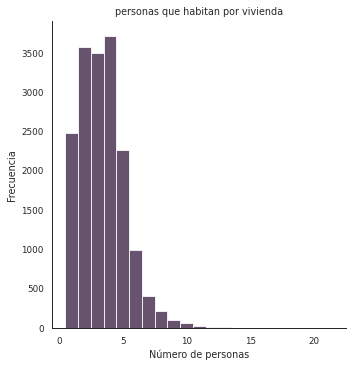

In [31]:
ax = sns.displot(inegi_df2["P1_1"], discrete=True)
plt.xlabel("Número de personas")
plt.ylabel("Frecuencia")
plt.title("personas que habitan por vivienda")

Text(0.5, 1.0, 'Histograma de personas que habitan por vivienda')

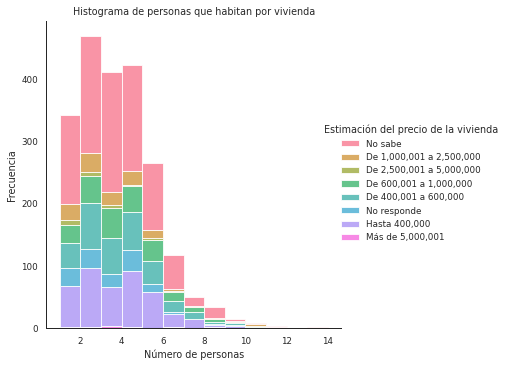

In [16]:
ax = sns.displot(inegi_df2, x="P1_1", binwidth=1, hue="P4_10A",multiple = "stack")
ax._legend.set_title("Estimación del precio de la vivienda")
plt.xlabel("Número de personas")
plt.ylabel("Frecuencia")
plt.title("Histograma de personas que habitan por vivienda")


Text(0.5, 1.0, 'Histograma de personas que habitan por vivienda')

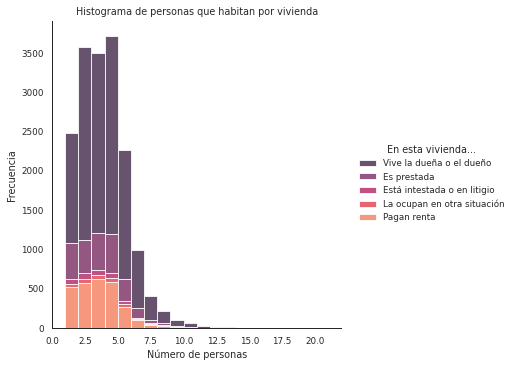

In [19]:
ax = sns.displot(inegi_df2, x="P1_1", binwidth=1, hue="P4_1",multiple = "stack")
ax._legend.set_title("En esta vivienda...")
plt.xlabel("Número de personas")
plt.ylabel("Frecuencia")
plt.title("Histograma de personas que habitan por vivienda")


### ¿Cuántos cuartos se usan para dormir?

Text(0.5, 1.0, '¿Cuántos cuartos se usan para dormir?')

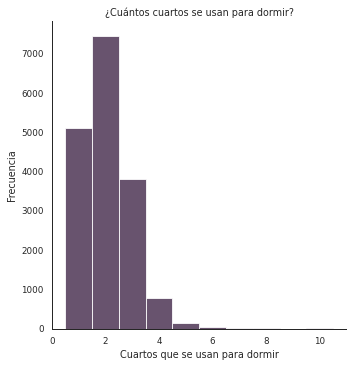

In [77]:
columna_data_cuartos = inegi_df2["P3_1"].loc[inegi_df2["P3_1"] < 99] # 99: son los que no dieron una respuesta definida
sns.displot(columna_data_cuartos, discrete=True)
plt.xlabel("Cuartos que se usan para dormir")
plt.ylabel("Frecuencia")
plt.title("¿Cuántos cuartos se usan para dormir?")

Text(0.5, 1.0, '¿Cuántos cuartos tiene en total esta vivienda contando la cocina?')

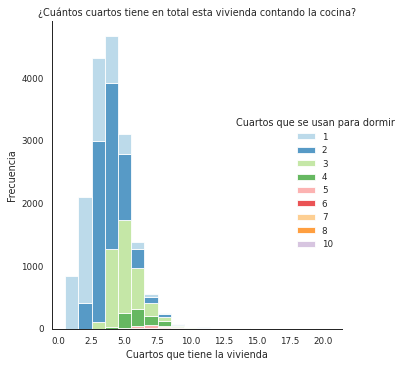

In [99]:
columna_data = inegi_df2["P3_2"].loc[inegi_df2["P3_2"] < 99]
ax = sns.displot(inegi_df2, x = columna_data, hue= columna_data_cuartos, palette= "Paired", discrete = True,  multiple = "stack")
ax._legend.set_title("Cuartos que se usan para dormir")
plt.xlabel("Cuartos que tiene la vivienda")
plt.ylabel("Frecuencia")
plt.title("¿Cuántos cuartos tiene en total esta vivienda contando la cocina?")

Text(0.5, 1.0, '¿Cuántos años de construida tiene esta vivienda?')

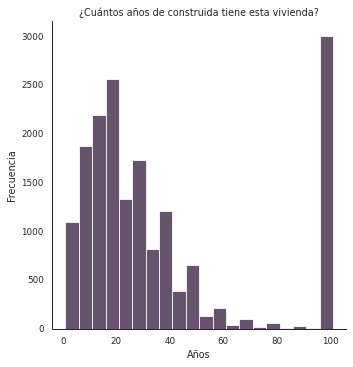

In [54]:
sns.displot(inegi_df2["P3_7_1"], binwidth = 5)
plt.xlabel("Años")
plt.ylabel("Frecuencia")
plt.title("¿Cuántos años de construida tiene esta vivienda?")

### ¿Cuántos metros cuadrados mide el terreno de esta vivienda?

Text(0.5, 1.0, '¿Cuántos metros cuadrados mide el terreno de esta vivienda?')

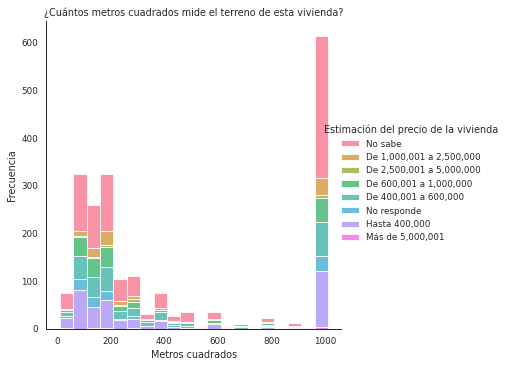

In [71]:

ax = sns.displot(inegi_df2, x = inegi_df2["P3_8_1"], hue="P4_10A",  binwidth = 50, multiple = "stack")
ax._legend.set_title("Estimación del precio de la vivienda")
plt.xlabel("Metros cuadrados")
plt.ylabel("Frecuencia")
plt.title("¿Cuántos metros cuadrados mide el terreno de esta vivienda?")

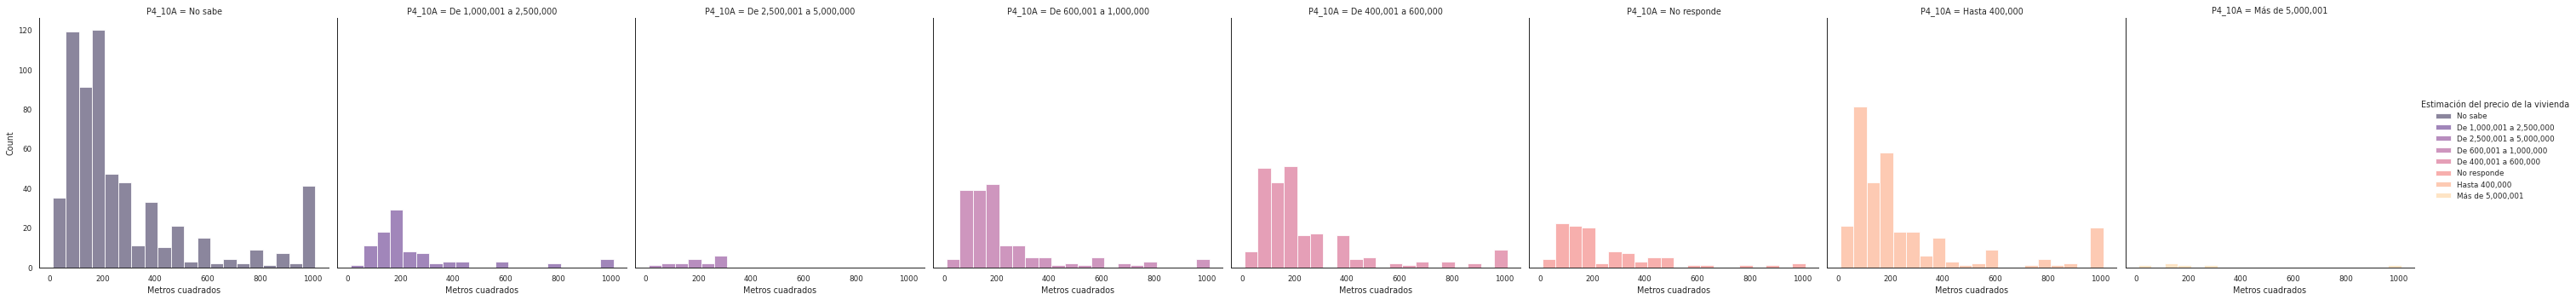

In [93]:
#ignorando a los que no saben o no respondieron
columna_data = inegi_df2["P3_8_1"].loc[inegi_df2["P3_8_1"] < 998]
ax = sns.displot(inegi_df2, x =columna_data, hue="P4_10A", palette = "magma",  binwidth = 50, col = "P4_10A")
ax._legend.set_title("Estimación del precio de la vivienda")
ax.set_axis_labels("Metros cuadrados")


###  ¿Cuántos metros de construcción tiene esta vivienda?

Text(0.5, 1.0, '¿Cuántos metros cuadrados mide el terreno de esta vivienda?')

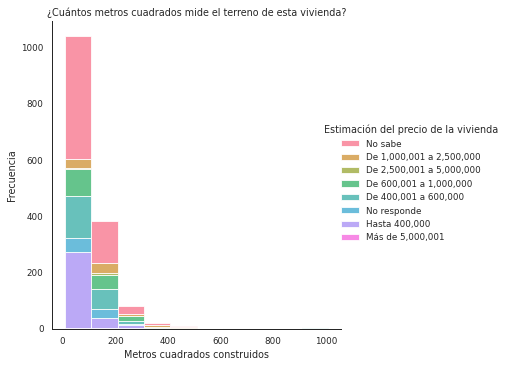

In [85]:
#ignorando a los que no saben o no respondieron
columna_data = inegi_df2["P3_9_1"].loc[inegi_df2["P3_9_1"] < 998]
ax = sns.displot(inegi_df2, x = columna_data, hue="P4_10A",  binwidth = 100, multiple = "stack")
ax._legend.set_title("Estimación del precio de la vivienda")
plt.xlabel("Metros cuadrados construidos")
plt.ylabel("Frecuencia")
plt.title("¿Cuántos metros cuadrados mide el terreno de esta vivienda?")

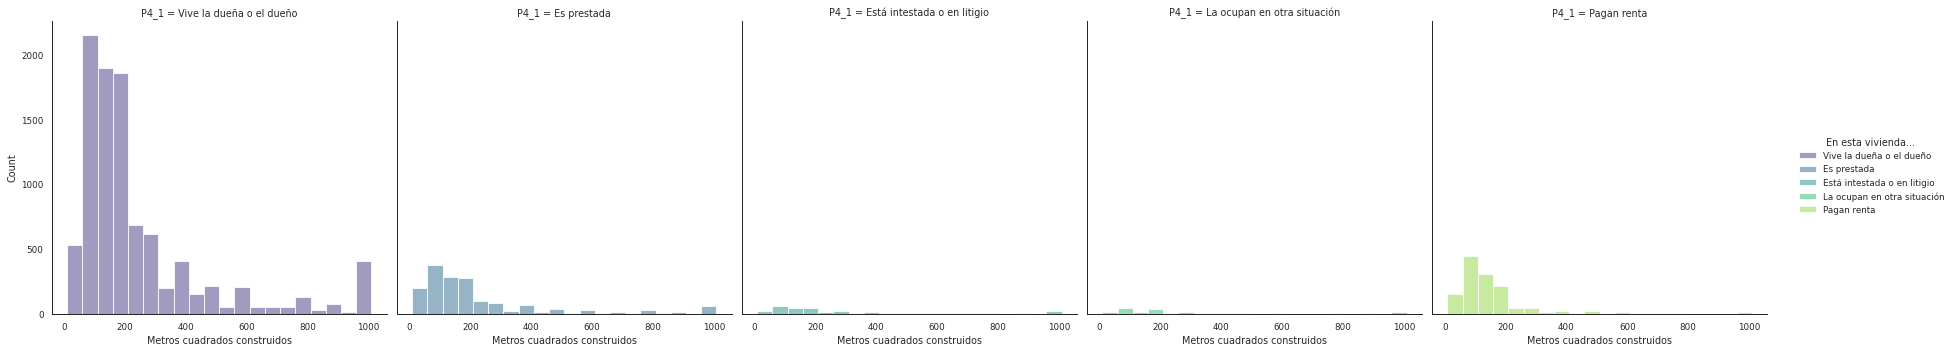

In [96]:
ax = sns.displot(inegi_df2, x =columna_data, hue="P4_1", palette = "viridis",  binwidth = 50, col = "P4_1")
ax._legend.set_title("En esta vivienda... ")
ax.set_axis_labels("Metros cuadrados construidos")


Text(0.5, 1.0, 'Histograma de personas que habitan por vivienda')

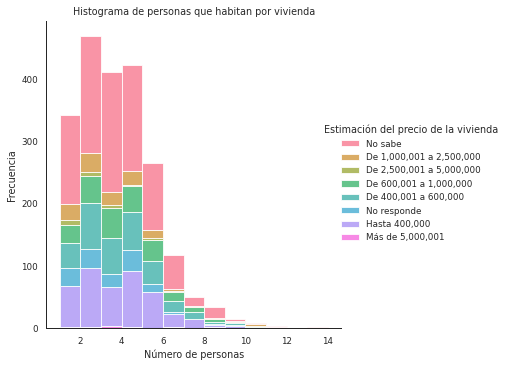

In [17]:
ax = sns.displot(inegi_df2, x="P1_1", binwidth=1, hue="P4_10A",multiple = "stack")
ax._legend.set_title("Estimación del precio de la vivienda")
plt.xlabel("Número de personas")
plt.ylabel("Frecuencia")
plt.title("Histograma de personas que habitan por vivienda")

Text(0.5, 1.0, 'Histograma de personas que habitan por vivienda')

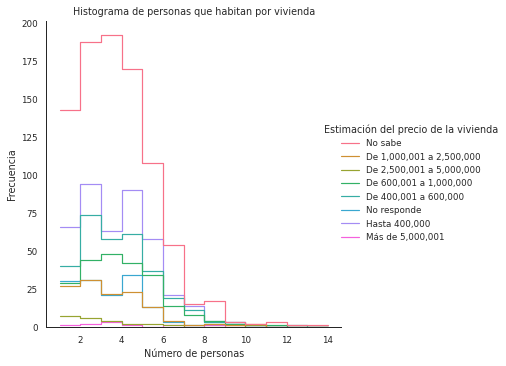

In [18]:
ax = sns.displot(inegi_df2, x="P1_1", binwidth=1, hue="P4_10A", element="step",fill=False)
ax._legend.set_title("Estimación del precio de la vivienda")
plt.xlabel("Número de personas")
plt.ylabel("Frecuencia")
plt.title("Histograma de personas que habitan por vivienda")


Text(0.5, 1.0, 'Distribución de densidad')

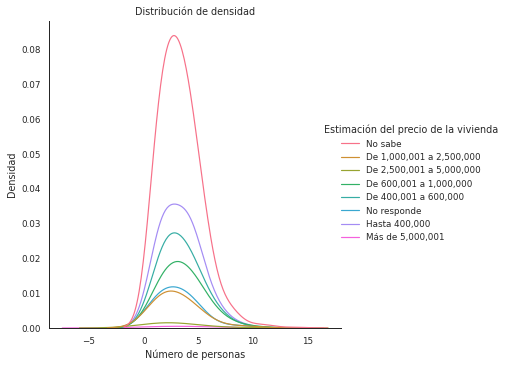

In [20]:
bx = sns.displot(inegi_df2, x="P1_1", hue="P4_10A", kind="kde", bw_adjust=2)
bx._legend.set_title("Estimación del precio de la vivienda")
plt.xlabel("Número de personas")
plt.ylabel("Densidad")
plt.title("Distribución de densidad")


## 2. Gráficas de dispersión

- Scatter plot
- Pairplot
- Displot en su modalidad tipo heatmap

In [ ]:
#sns.pairplot(inegi_df2)

## 3. Serie de tiempo

Una serie de tiempo no es más que el cambio de una variable numérica a través de una variable temporal. Ya que cuentas con ambas, construyamos una de estas series.

Completa las siguientes tareas:
1. Utiliza algún método para obtener el tipo de dato almacenado en cada columna.
2. Valida que al menos tengas una columna numérica (tipo int o float), una columna con fechas (tipo date) y una columna con valores categóricos (tipo object). Si no cuentas con alguna de ellas, por ejemplo, la de fechas; puedes elegir otro conjunto de datos de la lista de INEGI.
3. Finalmente, plantea al menos 3 preguntas que quieras responder con los datos que descargaste. Procura que esas preguntas te lleven a realizar al menos:
  - Una gráfica para datos numéricos (barras, dispersión, área, etc).
  - Una gráfica para datos categóricos y numéricos (mapa de calor, gráfica de burbujas, treemap).
  - Una serie de tiempo. Puedes reutilizar la columna numérica que utilices para el primer punto pero recuerda contar con la columna de fechas.